# Importing libraries and loading data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-vaccinations-india/Covid-19_Daily_Vaccinations_India.csv
/kaggle/input/covid19-vaccinations-india/Covid-19_Statewise_Vaccination_India.csv


In [2]:
df = pd.read_csv("/kaggle/input/covid19-vaccinations-india/Covid-19_Daily_Vaccinations_India.csv", index_col=0)
df.head()

,location,date,vaccine,source_url,total_vaccinations,total_vaccinations_per_hundred,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,daily_change_in_vaccinations,daily_vaccinations_per_million
0,India,15-01-2021,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350459...,0,0.00,0,0.00,0,0.0,0,0,0
1,India,16-01-2021,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350459...,191181,0.01,191181,0.01,0,0.0,191181,191181,139
2,India,17-01-2021,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350815...,224301,0.02,224301,0.02,0,0.0,112150,-79031,81
3,India,18-01-2021,"Covaxin, Oxford/AstraZeneca",https://www.mohfw.gov.in/,454049,0.03,454049,0.03,0,0.0,151350,39200,110
4,India,19-01-2021,"Covaxin, Oxford/AstraZeneca",https://www.mohfw.gov.in/,674835,0.05,674835,0.05,0,0.0,168709,17359,122


In [3]:
df.date = pd.to_datetime(df.date)

# Analysis of Data through various Plots

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


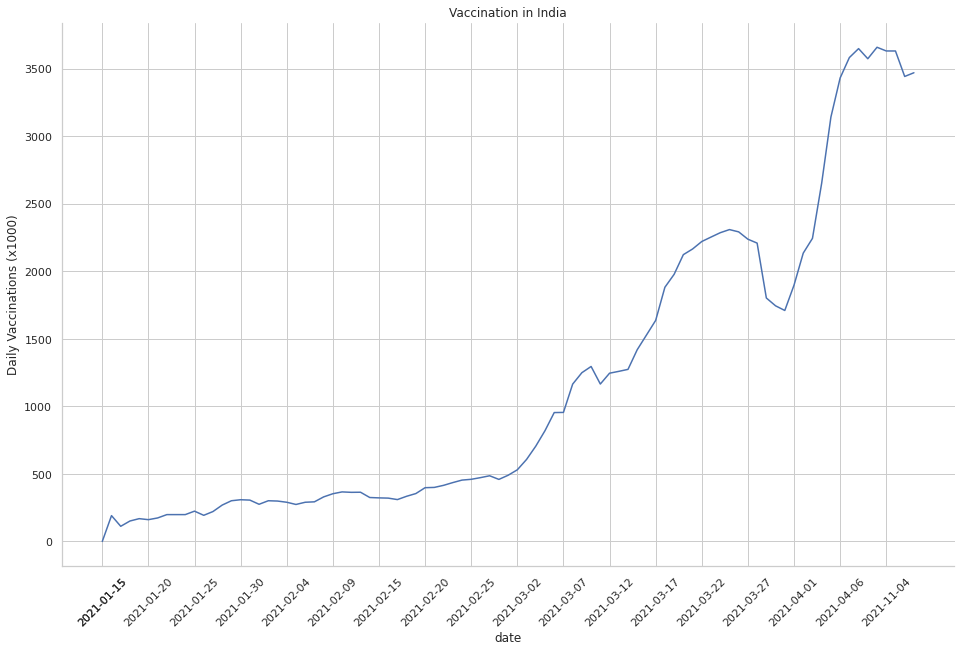

In [4]:
sns.set(style='whitegrid')
plt.figure(figsize=(16,10))
sns.lineplot(df.date.dt.strftime('%Y-%m-%d'), df.daily_vaccinations/1000, palette='RdBu_r')
locs, labels = plt.xticks()
x_labels = [x for x in range(len(labels)) if x%5==0] + [0]
plt.xticks(x_labels, rotation='45')
plt.ylabel('Daily Vaccinations (x1000)')
plt.title("Vaccination in India")
plt.gca().spines[['top', 'right']].set_visible(False)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


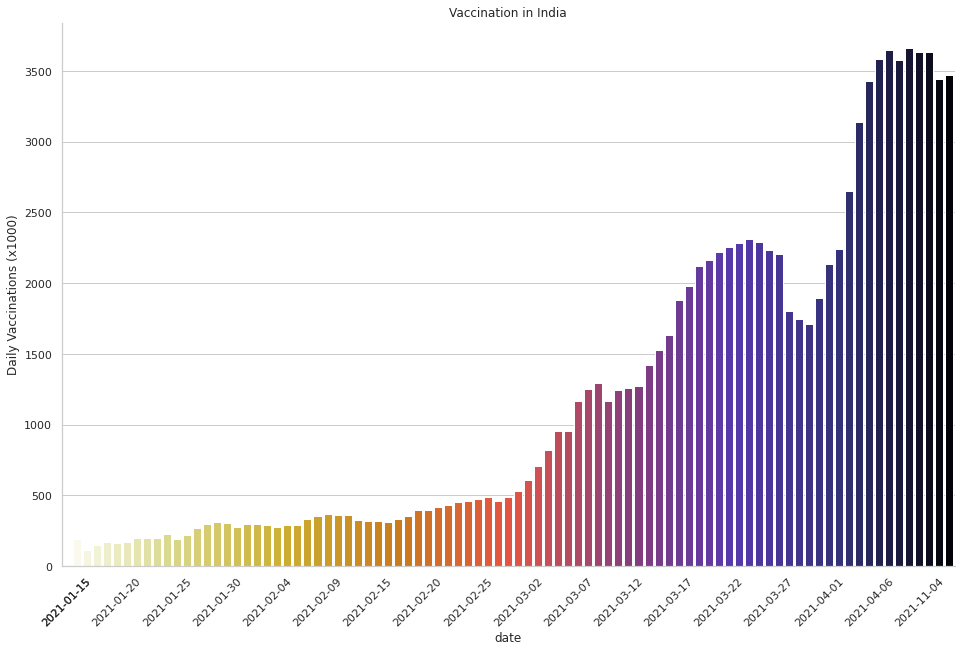

In [5]:
plt.figure(figsize=(16,10))
sns.barplot(df.date.dt.strftime('%Y-%m-%d'), df.daily_vaccinations/1000, palette='CMRmap_r')
locs, labels = plt.xticks()
x_labels = [x for x in range(len(labels)) if x%5==0] + [0]
plt.xticks(x_labels, rotation='45')
plt.ylabel('Daily Vaccinations (x1000)')
plt.title("Vaccination in India")
plt.gca().spines[['top', 'right']].set_visible(False)

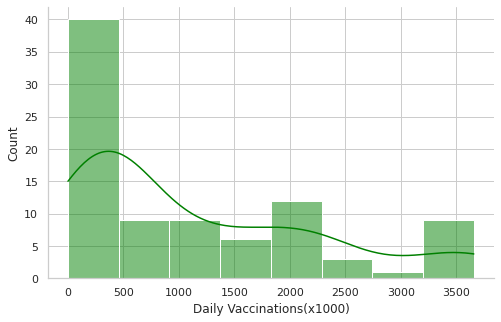

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df.daily_vaccinations/1000, kde=True, color='green')
plt.xlabel('Daily Vaccinations(x1000)')
plt.gca().spines[['top', 'right']].set_visible(False)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


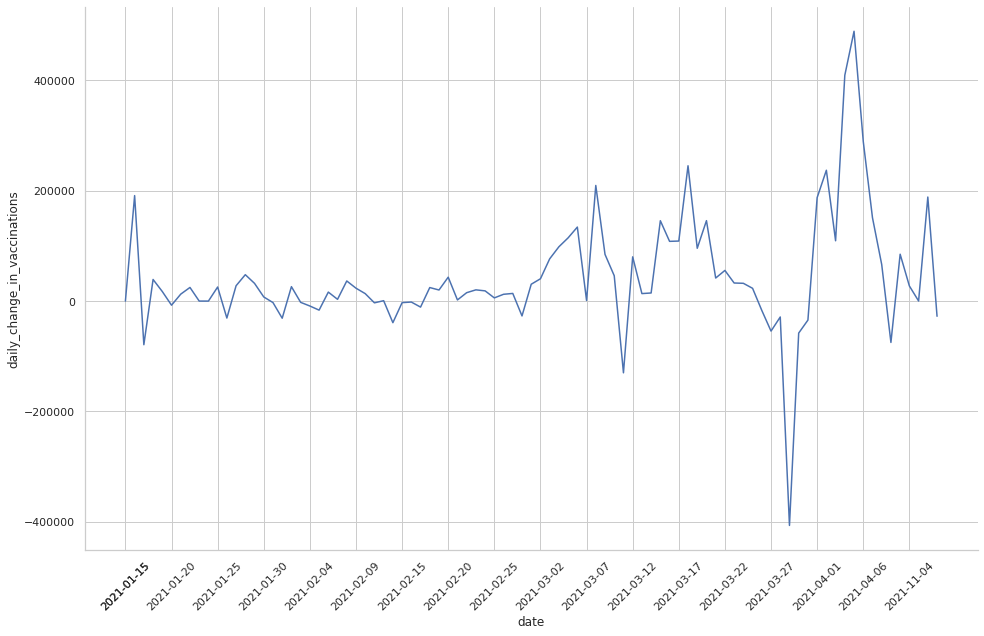

In [7]:
plt.figure(figsize=(16,10))
sns.lineplot(df.date.dt.strftime('%Y-%m-%d'), df.daily_change_in_vaccinations)
locs, labels = plt.xticks()
x_labels = [x for x in range(len(labels)) if x%5==0] + [0]
plt.xticks(x_labels, rotation='45')
plt.gca().spines[['top', 'right']].set_visible(False)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


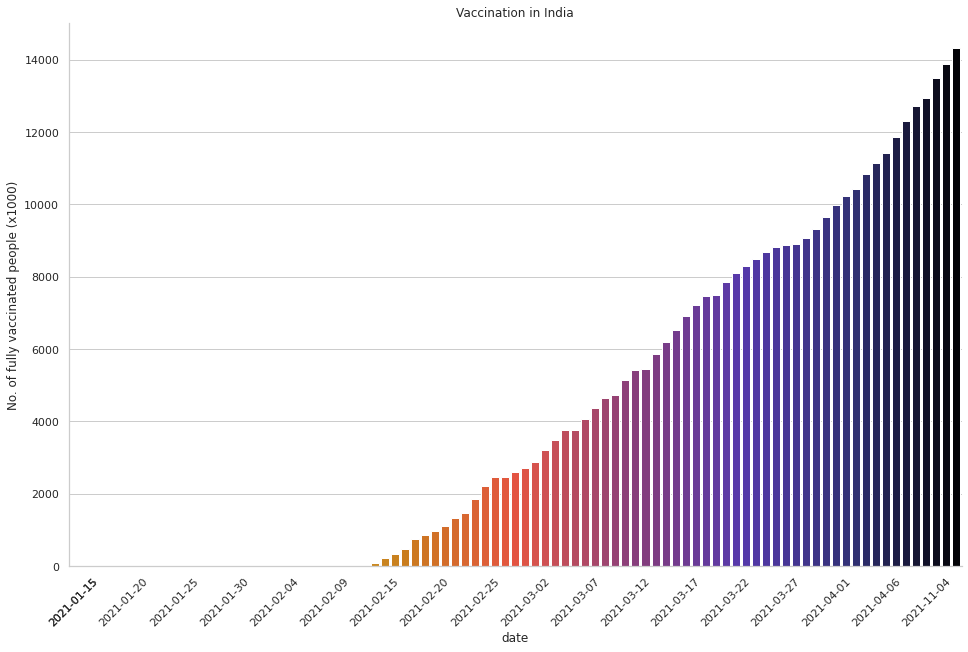

In [8]:
plt.figure(figsize=(16,10))
sns.barplot(df.date.dt.strftime('%Y-%m-%d'), df.people_fully_vaccinated/1000, palette='CMRmap_r')
locs, labels = plt.xticks()
x_labels = [x for x in range(len(labels)) if x%5==0] + [0]
plt.xticks(x_labels, rotation='45')
plt.ylabel('No. of fully vaccinated people (x1000)')
plt.title("Vaccination in India")
plt.gca().spines[['top', 'right']].set_visible(False)